In [167]:
# imports
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import pandas as pd

In [276]:
s = pd.read_excel('../data/in/sophy.xlsx', sheet_name='sample', index_col=0)
s = s[s['source_name'] == 'joyw']
s = s[['percent_phaeo', 'salinity', 'temperature', 'nitrate', 'chl_a']]
s = s.dropna().reset_index()
s = s.where(np.abs(stats.zscore(s) < 1)).dropna()
# Train test split
# X_train, X_test, y_train, y_test = train_test_split(s[['salinity', 'chl_a', 'temperature', 'nitrate']], s['percent_phaeo'], test_size=0.33, random_state=42)
X_train = s[['salinity', 'temperature', 'chl_a', 'nitrate']]
y_train = s['percent_phaeo']

In [264]:
X_train

,salinity,temperature,chl_a
2,33.751700,-1.676600,0.314569
3,33.751950,-1.674950,0.301765
4,33.752050,-1.680000,0.333140
5,33.752000,-1.673600,0.329426
6,33.765838,-1.691088,0.355224
...,...,...,...
154,33.951300,-1.690100,0.180017
155,33.815450,-1.628633,0.653486
156,33.792200,-1.699800,0.587301
157,33.790037,-1.699763,0.526433


In [277]:
# Z-Score Standardization
std_scaler = StandardScaler()
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

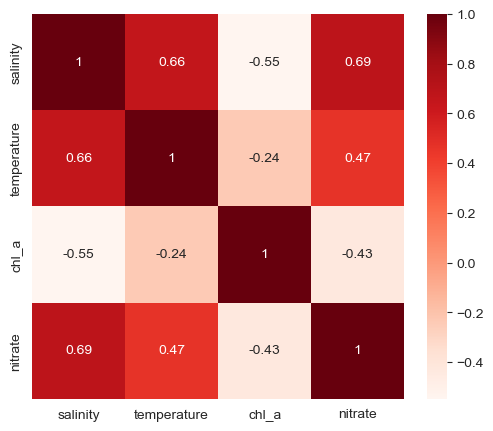

In [282]:
# Pearson Correlation
plt.figure(figsize=(6,5))
cor = X_train.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

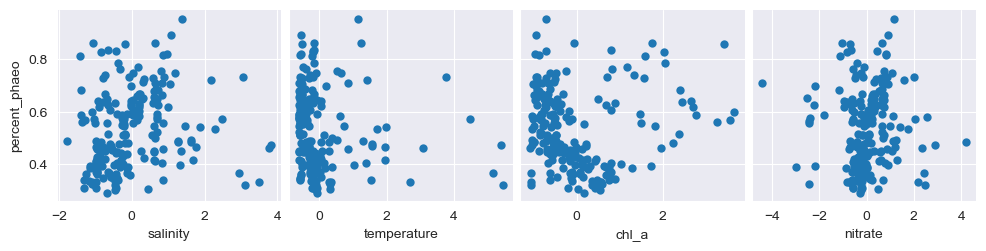

In [278]:
# Pairplots for X_feature vs percent_phaeo
# s2 = pd.concat([X_train, y_train], axis=1)
# s2[X_train.columns.values] = s2[X_train.columns.values].where(np.abs(stats.zscore(s2[X_train.columns.values])) < 1)
# s2[y_train.name] = s2[y_train.name].where(np.abs(stats.zscore(s2[y_train.name])) < 2)

# X_train = X_train.where(np.abs(stats.zscore(X_train) < 1)).dropna()
# y_train = y_train.where(np.abs(stats.zscore(y_train) < 2))
s2 = pd.concat([X_train, y_train], axis=1)
sns.pairplot(s2, x_vars=X_train.columns.values, y_vars=y_train.name, plot_kws={'linewidth': 0})

In [253]:
X_train

,salinity,temperature,chl_a
0,-0.593125,NaN,-0.380115
1,-0.594020,NaN,-0.401799
2,-0.964459,-0.275200,-0.143340
3,-0.962501,-0.272173,-0.182192
4,-0.961718,-0.281440,-0.086988
...,...,...,...
194,-0.436603,-0.355210,-0.027278
195,-0.545463,-0.335322,0.133653
196,NaN,NaN,-1.046129
197,-0.568958,-0.295570,0.230599


In [279]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = LassoCV(cv=cv)
# fit model
model.fit(X_train, y_train)
# summarize chosen configuration
print('alpha = %f' % model.alpha_)

alpha = 0.000027


MSE: 0.017303765548204775
R^2: 0.19416865825118113


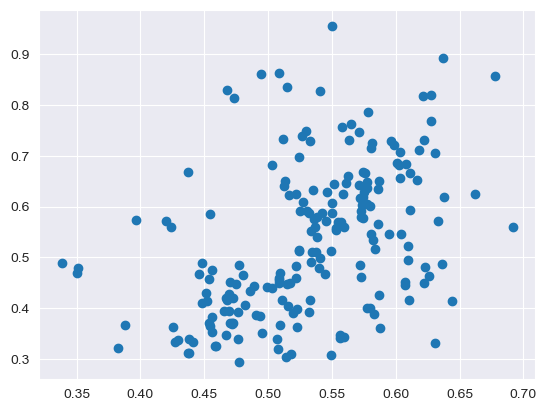

In [280]:
# alpha: 0.000226

# define model
model = Lasso(alpha=model.alpha_)
# fit model
model.fit(X_train, y_train)
# make a prediction
yhat = model.predict(X_train)
# summarize prediction
# print(f'Predicted: {yhat}')
print(f'MSE: {mean_squared_error(y_true=y_train, y_pred=yhat)}')
print(f'R^2: {r2_score(y_true=y_train, y_pred=yhat)}')
# print(yhat)
# print(y_test.to_numpy())
plt.scatter(yhat, y_train)

In [281]:
model.coef_

array([ 0.10550638, -0.07269785,  0.03328282, -0.0186032 ])